In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # While we try without this line, we get error as the colab can't use the imshow directly 
!pip install face_recognition  # If there is no face_recognition package we need to install it by running this line
import face_recognition # Imporing thr face regnition library

In [ ]:
from google.colab import drive # Mounting GDrive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


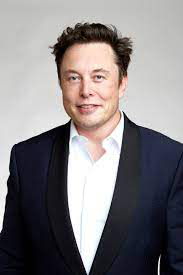

(275, 183, 3)


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
imgElon = face_recognition.load_image_file('/content/drive/MyDrive/Colab Notebooks/Elon Musk.jpg')
# https://stackoverflow.com/questions/50963283/python-opencv-imshow-doesnt-need-convert-from-bgr-to-rgb
imgElon = cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB) # We are just swithing the color orders for our convenience
cv2_imshow(imgElon)  # For colab we need to use cv2_imshow, instead of cv2.imshow
print(imgElon.shape)

In [ ]:
imgTest = face_recognition.load_image_file('/content/drive/MyDrive/Colab Notebooks/Elong Musk2.jpeg')
imgTest = cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB)
print(imgTest.shape) # The size of the image is too large, we need to resize it
#cv2_imshow(imgTest)

(2840, 4000, 3)


(275, 183, 3)


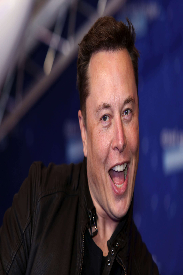

In [ ]:
# imgTest = cv2.resize(imgTest, (275,183)) # resizing opencv logo to be the same size as messi
imgTest = cv2.resize(imgTest, (183 , 275))  # This will resize the image we need to give (width*height) instead of (height*width)
print(imgTest.shape)
cv2_imshow(imgTest)

In [ ]:
faceloc = face_recognition.face_locations(imgElon)[0]
encodeElon = face_recognition.face_encodings(imgElon)[0]
print(faceloc) # (top right * bottom right * bottom left * top left) at this position, there is a face

(47, 121, 121, 46)


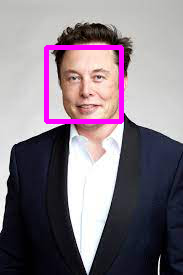

In [ ]:
cv2.rectangle(imgElon,(faceloc[3],faceloc[0]),(faceloc[1],faceloc[2]),(255,0,255),3)
cv2_imshow(imgElon)

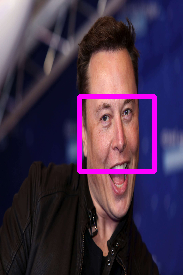

In [ ]:
facelocTest = face_recognition.face_locations(imgTest)[0]  
encodeTest = face_recognition.face_encodings(imgTest)[0]
cv2.rectangle(imgTest,(facelocTest[3],facelocTest[0]),(facelocTest[1],facelocTest[2]),(255,0,255),3) #(255*0*255) is for purple color , 3 is the thickness
cv2_imshow(imgTest)

In [ ]:
result = face_recognition.compare_faces([encodeElon] , encodeTest)
print(result)

[True]


(168, 300, 3)


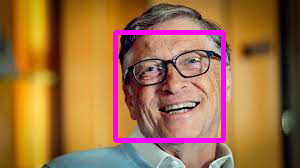

In [ ]:
imgTest2 = face_recognition.load_image_file('/content/drive/MyDrive/Colab Notebooks/Bill Gates.jpg')
imgTest2 = cv2.cvtColor(imgTest2,cv2.COLOR_BGR2RGB)
print(imgTest2.shape)
facelcoTest2 = face_recognition.face_locations(imgTest2)[0]  
encodeTest2 = face_recognition.face_encodings(imgTest2)[0]
cv2.rectangle(imgTest2,(facelcoTest2[3],facelcoTest2[0]),(facelcoTest2[1],facelcoTest2[2]),(255,0,255),3) #(255*0*255) is for purple color , 3 is the thickness
cv2_imshow(imgTest2)

In [ ]:
result = face_recognition.compare_faces([encodeElon] , encodeTest)
print(result)

faceDist = face_recognition.face_distance([encodeElon], encodeTest)
print('Distance between two faces of Elon Musk : ', faceDist) # In this case the distance is low as the faces are similar

result2 = face_recognition.compare_faces([encodeElon] , encodeTest2)
print(result2)  # It compares imgElon with imgTest2, where there are 2 different persons, hence result is False

faceDist2 = face_recognition.face_distance([encodeElon], encodeTest2)
print('Distance between faces of Elon Musk and Bill Gates : ', faceDist2) # In this case the distance is high as the faces are dissimilar

[True]
Distance between two faces of Elon Musk :  [0.5600471]
[False]
Distance between faces of Elon Musk and Bill Gates :  [0.75843536]
